In [0]:
################ template to run PySpark V3 on Colab #######################

In [144]:
!wget https://archive.apache.org/dist/spark/spark-3.0.0-preview/spark-3.0.0-preview-bin-hadoop2.7.tgz
!tar xvzf spark-3.0.0-preview-bin-hadoop2.7.tgz
!pip install findspark

--2020-05-14 19:29:44--  https://archive.apache.org/dist/spark/spark-3.0.0-preview/spark-3.0.0-preview-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233622806 (223M) [application/x-gzip]
Saving to: ‘spark-3.0.0-preview-bin-hadoop2.7.tgz’

spark-3.0.0-preview 100%[===================>] 222.80M  77.5MB/s    in 2.9s    

2020-05-14 19:29:47 (77.5 MB/s) - ‘spark-3.0.0-preview-bin-hadoop2.7.tgz’ saved [233622806/233622806]

spark-3.0.0-preview-bin-hadoop2.7/
spark-3.0.0-preview-bin-hadoop2.7/python/
spark-3.0.0-preview-bin-hadoop2.7/python/setup.cfg
spark-3.0.0-preview-bin-hadoop2.7/python/pyspark/
spark-3.0.0-preview-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-3.0.0-preview-bin-hadoop2.7/python/pyspark/python/
spark-3.0.0-preview-bin-hadoop2.7/python/pyspark/python/pyspark/
spa

In [145]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install databricks
!pip install koalas

In [146]:
%env JAVA_HOME = /usr/lib/jvm/java-8-openjdk-amd64
%env SPARK_HOME=/content/spark-3.0.0-preview-bin-hadoop2.7

env: JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64
env: SPARK_HOME=/content/spark-3.0.0-preview-bin-hadoop2.7


In [0]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]")\
                             .appName('HelloSpark')\
                             .config('spark.ui.port', '4051')\
                             .getOrCreate()

sc = spark.sparkContext

#Test must give no error

In [0]:
import pyspark

In [0]:
################ end template PySpark on Colab ##########################

# Spark 3 Preview Highlights
Using pySpark with Google Colab & Spark 3.0 preview Deep Learning: Adds GPU Support
It supports heterogeneous GPUs like AMD, Intel, and Nvidia. For Kubernetes, it offers GPU isolation at the executor pod level. 

In addition to this we get:
- GPU acceleration for Pandas UDF.
- You can specify the number of GPUs in your RDD
operations.
- To easily specify a Deep Learning environment there is YARN and Docker support to launch Spark 3.0 with GPU.

In [150]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])

df.show(3, False)

+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



### Spark-ifying Pandas: Databrick’s Koalas with Google Colab


In [0]:
import databricks.koalas as ks
import pandas as pd

In [0]:
# Create a pandas DataFrame
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})
# Create a Koalas DataFrame
kdf = ks.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})
# Create a Koalas DataFrame by passing a pandas DataFrame
kdf = ks.DataFrame(pdf)
kdf = ks.from_pandas(pdf)

In [153]:
pdf

,A,B
0,0.157139,0.662210
1,0.318865,0.051073
2,0.898500,0.094309
3,0.706560,0.124109
4,0.834341,0.498165


In [154]:
#Likewise, the order of indices can be sorted by DataFrame.sort_index().
kdf.sort_index()

,A,B
0,0.157139,0.662210
1,0.318865,0.051073
2,0.898500,0.094309
3,0.706560,0.124109
4,0.834341,0.498165


In [155]:
kdf.head(2)

,A,B
0,0.157139,0.662210
1,0.318865,0.051073


In [156]:
#A quick statistical summary of a Koalas DataFrame can be displayed using DataFrame.describe().
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.583081,0.285973
std,0.327531,0.275995
min,0.157139,0.051073
25%,0.318865,0.094309
50%,0.706560,0.124109
75%,0.834341,0.498165
max,0.898500,0.662210


In [157]:
#Sorting a Koalas DataFrame can be done using DataFrame.sort_values().
kdf.sort_values(by='B')

,A,B
1,0.318865,0.051073
2,0.898500,0.094309
3,0.706560,0.124109
4,0.834341,0.498165
0,0.157139,0.662210


In [158]:
#Transposing a Koalas DataFrame can be done using DataFrame.transpose().
kdf.transpose()

,0,1,2,3,4
A,0.157139,0.318865,0.898500,0.706560,0.834341
B,0.662210,0.051073,0.094309,0.124109,0.498165


In [0]:
from databricks.koalas.config import set_option, get_option

In [160]:
ks.get_option('compute.max_rows')

2000

In [0]:
ks.set_option('compute.max_rows', 2000)

In [162]:
ks.get_option('compute.max_rows')

2000

In [163]:
#As with a pandas DataFrame, selecting a single column from a Koalas DataFrame returns a Series.
kdf['A']

0    0.157139
1    0.318865
2    0.898500
3    0.706560
4    0.834341
Name: A, dtype: float64

In [164]:
#Selecting multiple columns from a Koalas DataFrame returns a Koalas DataFrame.
kdf[['A', 'B']]

,A,B
0,0.157139,0.662210
1,0.318865,0.051073
2,0.898500,0.094309
3,0.706560,0.124109
4,0.834341,0.498165


In [165]:
#Slicing is available for selecting rows from a Koalas DataFrame.
kdf.loc[1:2]

,A,B
1,0.318865,0.051073
2,0.898500,0.094309


In [166]:
#Slicing rows and columns is also available.
kdf.iloc[:3, 1:2]

,B
0,0.662210
1,0.051073
2,0.094309


Applying a Python Function to Koalas DataFrame
DataFrame.apply() is a very powerful function favored by many pandas users. Koalas DataFrames also support this function.

In [167]:
kdf.apply(np.cumsum)

,A,B
0,0.157139,0.662210
1,0.476004,0.713283
2,1.374504,0.807592
3,2.081065,0.931701
4,2.915406,1.429865


In [168]:
#DataFrame.apply() also works for axis = 1 or ‘columns’ (0 or ‘index’ is the default).
kdf.apply(np.cumsum, axis=1)

,A,B
0,0.157139,0.819348
1,0.318865,0.369938
2,0.898500,0.992809
3,0.706560,0.830669
4,0.834341,1.332506


In [169]:
#Also, a Python native function can be applied to a Koalas DataFrame.
kdf.apply(lambda x: x ** 2)

,A,B
0,0.024693,0.438522
1,0.101675,0.002608
2,0.807303,0.008894
3,0.499228,0.015403
4,0.696126,0.248168


In [170]:
def square(x) -> ks.Series[np.float64]:
    return x ** 2
kdf.apply(square)

,A,B
0,0.807303,0.008894
1,0.499228,0.015403
2,0.696126,0.248168
3,0.024693,0.438522
4,0.101675,0.002608


In [171]:
'''Note that DataFrame.apply() in Koalas does not support global aggregations by its design.
However, If the size of data is lower than compute.shortcut_limit, 
it might work because it uses pandas as a shortcut execution. '''

'Note that DataFrame.apply() in Koalas does not support global aggregations by its design.\nHowever, If the size of data is lower than compute.shortcut_limit, \nit might work because it uses pandas as a shortcut execution. '

In [172]:
# Working properly since size of data <= compute.shortcut_limit (1000)
ks.DataFrame({'A': range(1000)}).apply(lambda col: col.max())

A    999
Name: 0, dtype: int64

In [173]:
ks.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

A    1000
Name: 0, dtype: int64

In [0]:
ks.set_option('compute.shortcut_limit', 1001)

In [175]:
ks.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

A    1000
Name: 0, dtype: int64

Grouping Data
Grouping data by columns is one of the common APIs in pandas. DataFrame.groupby() is available in Koalas as well.

In [176]:
kdf.groupby('A').sum()

,B
A,
0.318865,0.051073
0.706560,0.124109
0.157139,0.662210
0.898500,0.094309
0.834341,0.498165


In [177]:
#See also grouping data by multiple columns below.
kdf.groupby(['A', 'B']).sum()

,
A,B
0.898500,0.094309
0.318865,0.051073
0.834341,0.498165
0.706560,0.124109
0.157139,0.662210


## Plotting and Visualizing Data
In pandas, DataFrame.plot is a good solution for visualizing data. It can be used in the same way in Koalas.

Note that Koalas leverages approximation for faster rendering. Therefore, the results could be slightly different when the number of data is larger than plotting.max_rows.

See the example below that plots a Koalas DataFrame as a bar chart with DataFrame.plot.bar().

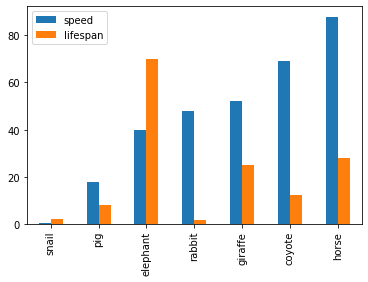

In [178]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
          'rabbit', 'giraffe', 'coyote', 'horse']
kdf = ks.DataFrame({'speed': speed,
                     'lifespan': lifespan}, index=index)
kdf.plot.bar()

Also, The horizontal bar plot is supported with DataFrame.plot.barh()



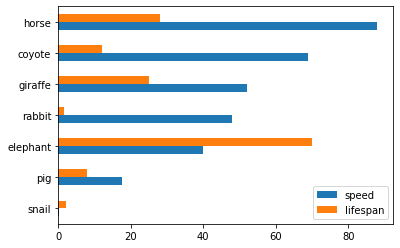

In [179]:
kdf.plot.barh()

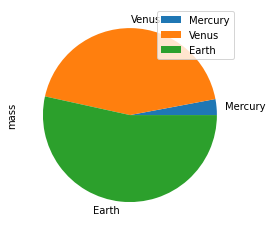

In [180]:
#Make a pie plot using DataFrame.plot.pie().
kdf = ks.DataFrame({'mass': [0.330, 4.87, 5.97],
                     'radius': [2439.7, 6051.8, 6378.1]},
                    index=['Mercury', 'Venus', 'Earth'])
kdf.plot.pie(y='mass')

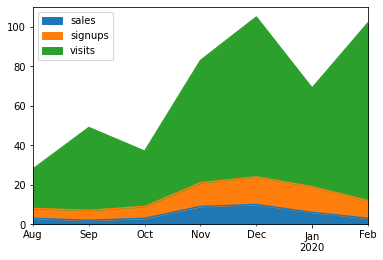

In [181]:
#Make a stacked area plot using DataFrame.plot.area().
kdf = ks.DataFrame({
     'sales': [3, 2, 3, 9, 10, 6, 3],
     'signups': [5, 5, 6, 12, 14, 13, 9],
     'visits': [20, 42, 28, 62, 81, 50, 90], },
      index=pd.date_range(start='2019/08/15', end='2020/03/09',freq='M'))
kdf.plot.area()

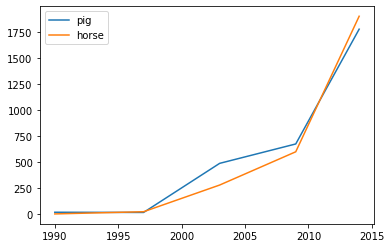

In [182]:
#Make line charts using DataFrame.plot.line().
kdf = ks.DataFrame({'pig': [20, 18, 489, 675, 1776],
                     'horse': [4, 25, 281, 600, 1900]},
                    index=[1990, 1997, 2003, 2009, 2014])
kdf.plot.line()

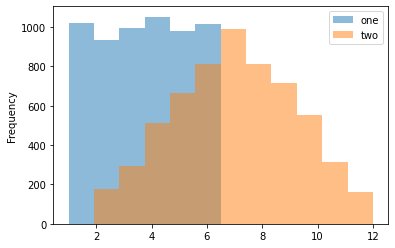

In [183]:
#Make a histogram using DataFrame.plot.hist()
kdf = pd.DataFrame(
     np.random.randint(1, 7, 6000),
     columns=['one'])
kdf['two'] = kdf['one'] + np.random.randint(1, 7, 6000)
kdf = ks.from_pandas(kdf)
kdf.plot.hist(bins=12, alpha=0.5)

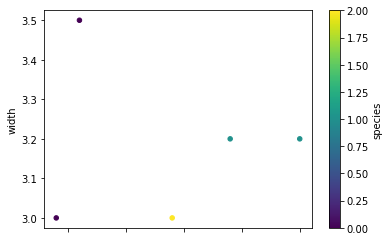

In [184]:
#Make a scatter plot using DataFrame.plot.scatter()
kdf = ks.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                     [6.4, 3.2, 1], [5.9, 3.0, 2]],
                    columns=['length', 'width', 'species'])
kdf.plot.scatter(x='length', y='width', c='species', colormap='viridis')


### Convert

In [185]:
kidx = kdf.index
kidx.to_pandas().to_list()
[0, 1, 2, 3, 4]

[0, 1, 2, 3, 4]

In [186]:
kdf = ks.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'F': 'foo'})
kdf

,A,B,C,D,F
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [0]:
i = pd.date_range('2018-04-09', periods=2000, freq='1D1min')
ts = ks.DataFrame({'A': ['timestamp']}, index=i)
#ts.between_time('0:15', '0:16')  ## ERROR

In [188]:
ts.to_pandas().between_time('0:15', '0:16')

,A
2018-04-24 00:15:00,timestamp
2018-04-25 00:16:00,timestamp
2022-04-04 00:15:00,timestamp
2022-04-05 00:16:00,timestamp


In [0]:
#ts.map_in_pandas(func=lambda pdf: pdf.between_time('0:15', '0:16'))

### Using SQL in Koalas
Koalas supports standard SQL syntax with ks.sql() which allows executing Spark SQL query and returns the result as a Koalas DataFrame.

In [190]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                     'pig': [20, 18, 489, 675, 1776],
                     'horse': [4, 25, 281, 600, 1900]})
ks.sql("SELECT * FROM {kdf} WHERE pig > 100")

,year,pig,horse
0,2003,489,281
1,2009,675,600
2,2014,1776,1900


In [191]:
#Also, mixing Koalas DataFrame and pandas DataFrame is supported in a join operation.
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                     'sheep': [22, 50, 121, 445, 791],
                     'chicken': [250, 326, 589, 1241, 2118]})
ks.sql('''
     SELECT ks.pig, pd.chicken
     FROM {kdf} ks INNER JOIN {pdf} pd
     ON ks.year = pd.year
     ORDER BY ks.pig, pd.chicken''')

,pig,chicken
0,18,326
1,20,250
2,489,589
3,675,1241
4,1776,2118


### Conversion from and to PySpark DataFrame
A Koalas DataFrame can be easily converted to a PySpark DataFrame using DataFrame.to_spark(), similar to DataFrame.to_pandas(). 

In [192]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
sdf = kdf.to_spark()
type(sdf)
sdf.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+



In [193]:
from databricks.koalas import option_context
with option_context(
         "compute.default_index_type", "distributed-sequence"):
     kdf = sdf.to_koalas()
type(kdf)
kdf

,A,B
2,3,30
3,4,40
4,5,50
0,1,10
1,2,20


In [194]:
sdf.to_koalas(index_col='A')

,B
A,
1,10
2,20
3,30
4,40
5,50


# Object Creation


In [0]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [196]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [0]:
#Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)

In [198]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [200]:
pdf

,A,B,C,D
2013-01-01,-0.331587,1.752384,1.430421,-0.134487
2013-01-02,-0.252125,1.018958,0.144438,1.039907
2013-01-03,-0.407053,-0.223517,0.829346,-0.598593
2013-01-04,-1.122272,0.085787,0.128942,-0.598974
2013-01-05,-0.340829,0.848643,0.302164,-0.197896
2013-01-06,-0.413826,-0.160387,-1.040593,-1.456376


In [0]:
kdf = ks.from_pandas(pdf)

In [202]:
type(kdf)

databricks.koalas.frame.DataFrame

In [203]:
kdf

,A,B,C,D
2013-01-01,-0.331587,1.752384,1.430421,-0.134487
2013-01-02,-0.252125,1.018958,0.144438,1.039907
2013-01-03,-0.407053,-0.223517,0.829346,-0.598593
2013-01-04,-1.122272,0.085787,0.128942,-0.598974
2013-01-05,-0.340829,0.848643,0.302164,-0.197896
2013-01-06,-0.413826,-0.160387,-1.040593,-1.456376


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.

Creating a Spark DataFrame from pandas DataFrame

In [0]:
spark = SparkSession.builder.getOrCreate()

In [0]:
sdf = spark.createDataFrame(pdf)

In [206]:
sdf.show()

+--------------------+--------------------+-------------------+--------------------+
|                   A|                   B|                  C|                   D|
+--------------------+--------------------+-------------------+--------------------+
|-0.33158689007999004|   1.752383517627443| 1.4304211265329723| -0.1344866260682076|
|-0.25212490970731166|  1.0189584070229807|0.14443808018170876|   1.039907382912531|
| -0.4070534814328999| -0.2235168525134932| 0.8293460550088214| -0.5985930216146563|
|  -1.122272112818771| 0.08578687933314752|0.12894235675024326| -0.5989737773922645|
| -0.3408286565666187|  0.8486432908296843|0.30216438410644914|-0.19789590197622825|
|  -0.413825607914557|-0.16038719446263922|-1.0405931541718514| -1.4563764763356677|
+--------------------+--------------------+-------------------+--------------------+



Creating Koalas DataFrame from Spark DataFrame. to_koalas() is automatically attached to Spark DataFrame and available as an API when Koalas is imported.



In [0]:
kdf = sdf.to_koalas()

In [208]:
kdf

,A,B,C,D
0,-0.331587,1.752384,1.430421,-0.134487
1,-0.252125,1.018958,0.144438,1.039907
2,-0.407053,-0.223517,0.829346,-0.598593
3,-1.122272,0.085787,0.128942,-0.598974
4,-0.340829,0.848643,0.302164,-0.197896
5,-0.413826,-0.160387,-1.040593,-1.456376


In [209]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

#Viewing Data
See the API Reference.

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not ordered, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use .loc or iloc instead.

In [210]:
kdf.head()

,A,B,C,D
0,-0.331587,1.752384,1.430421,-0.134487
1,-0.252125,1.018958,0.144438,1.039907
2,-0.407053,-0.223517,0.829346,-0.598593
3,-1.122272,0.085787,0.128942,-0.598974
4,-0.340829,0.848643,0.302164,-0.197896


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [211]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [212]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [213]:
kdf.to_numpy()

array([[-0.33158689,  1.75238352,  1.43042113, -0.13448663],
       [-0.25212491,  1.01895841,  0.14443808,  1.03990738],
       [-0.40705348, -0.22351685,  0.82934606, -0.59859302],
       [-1.12227211,  0.08578688,  0.12894236, -0.59897378],
       [-0.34082866,  0.84864329,  0.30216438, -0.1978959 ],
       [-0.41382561, -0.16038719, -1.04059315, -1.45637648]])

In [214]:
#Describe shows a quick statistic summary of your data
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.477949,0.553645,0.299120,-0.324403
std,0.321095,0.783993,0.825677,0.817967
min,-1.122272,-0.223517,-1.040593,-1.456376
25%,-0.413826,-0.160387,0.128942,-0.598974
50%,-0.407053,0.085787,0.144438,-0.598593
75%,-0.331587,1.018958,0.829346,-0.134487
max,-0.252125,1.752384,1.430421,1.039907


In [215]:
#Transposing your data
kdf.T

,0,1,2,3,4,5
A,-0.331587,-0.252125,-0.407053,-1.122272,-0.340829,-0.413826
B,1.752384,1.018958,-0.223517,0.085787,0.848643,-0.160387
C,1.430421,0.144438,0.829346,0.128942,0.302164,-1.040593
D,-0.134487,1.039907,-0.598593,-0.598974,-0.197896,-1.456376


In [216]:
#Sorting by its index
kdf.sort_index(ascending=False)

,A,B,C,D
5,-0.413826,-0.160387,-1.040593,-1.456376
4,-0.340829,0.848643,0.302164,-0.197896
3,-1.122272,0.085787,0.128942,-0.598974
2,-0.407053,-0.223517,0.829346,-0.598593
1,-0.252125,1.018958,0.144438,1.039907
0,-0.331587,1.752384,1.430421,-0.134487


In [217]:
#Sorting by value
kdf.sort_values(by='B')

,A,B,C,D
2,-0.407053,-0.223517,0.829346,-0.598593
5,-0.413826,-0.160387,-1.040593,-1.456376
3,-1.122272,0.085787,0.128942,-0.598974
4,-0.340829,0.848643,0.302164,-0.197896
1,-0.252125,1.018958,0.144438,1.039907
0,-0.331587,1.752384,1.430421,-0.134487


#Missing Data
Koalas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [0]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [0]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [0]:
kdf1 = ks.from_pandas(pdf1)

In [221]:
kdf1

,A,B,C,D,E
2013-01-01,-0.331587,1.752384,1.430421,-0.134487,1.0
2013-01-02,-0.252125,1.018958,0.144438,1.039907,1.0
2013-01-03,-0.407053,-0.223517,0.829346,-0.598593,NaN
2013-01-04,-1.122272,0.085787,0.128942,-0.598974,NaN


To drop any rows that have missing data.


In [222]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.331587,1.752384,1.430421,-0.134487,1.0
2013-01-02,-0.252125,1.018958,0.144438,1.039907,1.0


In [223]:
#Filling missing data.
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.331587,1.752384,1.430421,-0.134487,1.0
2013-01-02,-0.252125,1.018958,0.144438,1.039907,1.0
2013-01-03,-0.407053,-0.223517,0.829346,-0.598593,5.0
2013-01-04,-1.122272,0.085787,0.128942,-0.598974,5.0


## Operations
Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [224]:
kdf.mean()

A   -0.477949
B    0.553645
C    0.299120
D   -0.324403
Name: 0, dtype: float64

### Getting data in/out
See the Input/Output docs.

###CSV
CSV is straightforward and easy to use. See here to write a CSV file and here to read a CSV file.

In [225]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,-1.122272,0.085787,0.128942,-0.598974
1,-0.340829,0.848643,0.302164,-0.197896
2,-0.413826,-0.160387,-1.040593,-1.456376
3,-0.331587,1.752384,1.430421,-0.134487
4,-0.252125,1.018958,0.144438,1.039907
5,-0.407053,-0.223517,0.829346,-0.598593


### Parquet
Parquet is an efficient and compact file format to read and write faster. See here to write a Parquet file and here to read a Parquet file.

In [226]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,-0.331587,1.752384,1.430421,-0.134487
1,-0.252125,1.018958,0.144438,1.039907
2,-0.407053,-0.223517,0.829346,-0.598593
3,-1.122272,0.085787,0.128942,-0.598974
4,-0.340829,0.848643,0.302164,-0.197896
5,-0.413826,-0.160387,-1.040593,-1.456376


In [0]:
pdf= pd.DataFrame({'x': range(3),'y':['a','b','b'],'z':['a','b','b']})

### Create Koala Dataframe
df = ks.from_pandas(pdf)

## Rename the columns
df.columns = ['x','y','z1']

# Do some operations in place:
df['x2'] = df.x*df.x


In [228]:
df

,x,y,z1,x2
0,0,a,a,0
1,1,b,b,1
2,2,b,b,4


In [0]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

In [0]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [231]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
Name: 0, dtype: float64

In [0]:
pdf = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [233]:
pdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [234]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [0]:
dates = pd.date_range('20130101', periods=6)
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [0]:
# Covert pandas data frmae in koalas and spark
kdf = ks.from_pandas(pdf)

In [237]:
spark = SparkSession.builder.getOrCreate()
sdf = spark.createDataFrame(pdf)
type(sdf)

pyspark.sql.dataframe.DataFrame

In [238]:
type(pdf), type(kdf), type(sdf)

(pandas.core.frame.DataFrame,
 databricks.koalas.frame.DataFrame,
 pyspark.sql.dataframe.DataFrame)

In [239]:
kdf.head()

,A,B,C,D
2013-01-01,-0.903609,0.888543,-2.024557,1.453417
2013-01-02,0.178950,-1.133142,-0.188530,0.106693
2013-01-03,0.021641,0.993596,-0.234504,-0.626740
2013-01-04,-1.327375,-0.369192,-2.234879,0.082161
2013-01-05,0.457427,0.196653,0.692999,1.590036


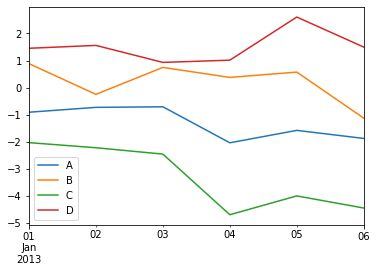

In [240]:
import matplotlib.pyplot as plt
kdf.cumsum().plot();

##Spark Configuration with Koalas
Since koalas is wrapper around spark, the spark configuration will impact koalas directly. You may tune the spark.cong.get parameters when working with Koalas.

In [0]:
## Spark Configuration

prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [242]:
# timeit with arrow.enabled
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

10 loops, best of 3: 120 ms per loop


In [243]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1 loop, best of 3: 1.01 s per loop


In [0]:
# Restore Default
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

### Saving and Reading Data
Koalas work very well saving and reading data in .csv, .parquet and .orc.

In [245]:
# csv
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

# parquet
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

# spark orc
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,-0.903609,0.888543,-2.024557,1.453417
1,0.178950,-1.133142,-0.188530,0.106693
2,0.021641,0.993596,-0.234504,-0.626740
3,-1.327375,-0.369192,-2.234879,0.082161
4,0.457427,0.196653,0.692999,1.590036
5,-0.296523,-1.699181,-0.446728,-1.107654


In [0]:
## Visit these vides

https://koalas.readthedocs.io/en/latest/getting_started/videos_blogs.html